In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Part 1

(1.0, 1000000.0)

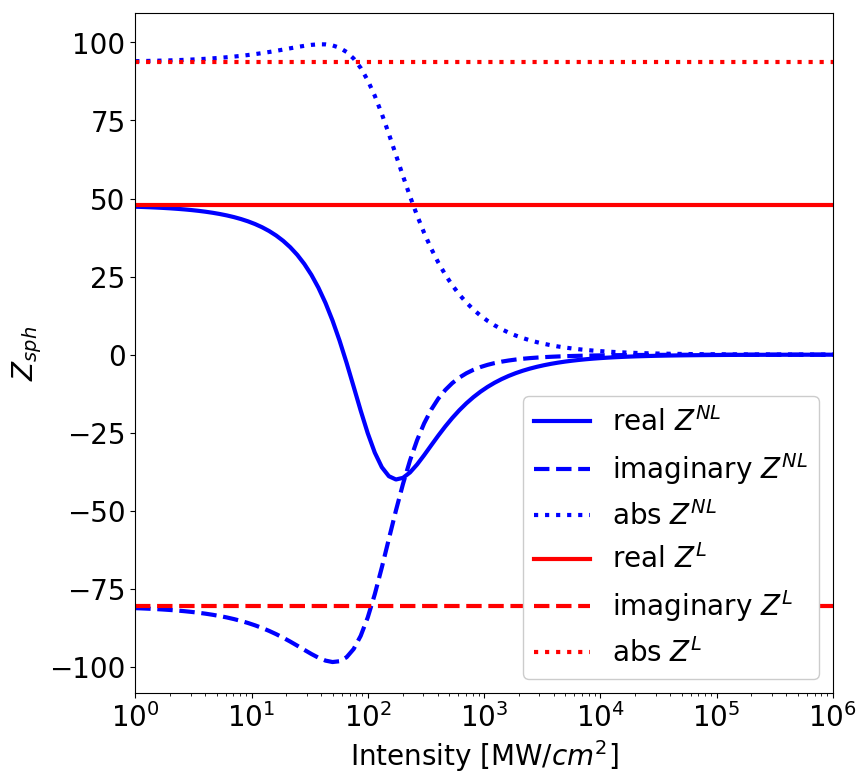

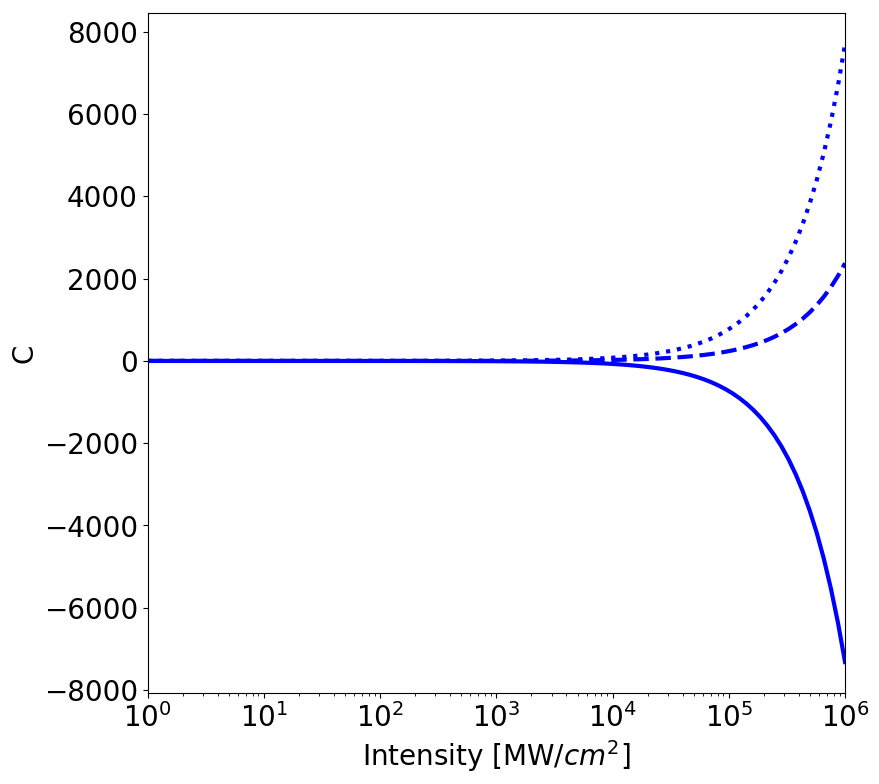

In [85]:
eps_0 = 8.85*1e-12

X3r = (-9.5+2.3*1j)*(1.e-15)
X3 = X3r*eps_0


eps_real = np.loadtxt("/Users/amirhossein/Desktop/New_Gold_JC_real.txt",skiprows=2)
eps_imag = np.loadtxt("/Users/amirhossein/Desktop/New_Gold_JC_imag.txt",skiprows=2)
omega = 2*np.pi*1e12*eps_real[:,0]
eps_r = eps_real[:,1]+eps_imag[:,1]*1j
eps = eps_r*eps_0


iw = 440
c = 3/(eps_r[iw]+2)

n0 = 377
I = np.logspace(10,16,100)
E_sqr = (I*(2*n0))

R = 20*1.e-9

C = c - (X3r/(eps_r[iw]+1))*np.power(c,3)*E_sqr

Z_nl = -(1j)*omega[iw]*np.pi*R*(eps[iw]+np.power(c,2)*E_sqr*X3)
Z_nl = np.reciprocal(Z_nl)

Z_l = -1j*omega[iw]*np.pi*R*eps[iw]
Z_l = np.reciprocal(Z_l)
tmp = np.empty(I.shape,dtype=complex)
tmp.fill(Z_l)
Z_l = tmp


fig=plt.figure(figsize=(9, 9), dpi= 100, facecolor='w', edgecolor='k')

p1 = plt.semilogx(I/1.e10,np.real(Z_nl),linewidth=3,linestyle="-",color="blue")
p2 = plt.semilogx(I/1.e10,np.imag(Z_nl),linewidth=3,linestyle="--",color="blue")
p3 = plt.semilogx(I/1.e10,np.abs(Z_nl),linewidth=3,linestyle="dotted",color="blue")

p1 = plt.semilogx(I/1.e10,np.real(Z_l),linewidth=3,linestyle="-",color="red")
p2 = plt.semilogx(I/1.e10,np.imag(Z_l),linewidth=3,linestyle="--",color="red")
p3 = plt.semilogx(I/1.e10,np.abs(Z_l),linewidth=3,linestyle="dotted",color="red")

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Intensity [MW/$cm^2$]', size=20)
plt.ylabel('$Z_{sph}$', size=20)

plt.legend(['real $Z^{NL}$', 'imaginary $Z^{NL}$', 'abs $Z^{NL}$',\
            'real $Z^{L}$', 'imaginary $Z^{L}$', 'abs $Z^{L}$'],fontsize=20,framealpha=1)

plt.xlim([np.amin(I/1.e10),np.amax(I/1.e10)])

fig=plt.figure(figsize=(9, 9), dpi= 100, facecolor='w', edgecolor='k')

p1 = plt.semilogx(I/1.e10,np.real(C),linewidth=3,linestyle="-",color="blue")
p2 = plt.semilogx(I/1.e10,np.imag(C),linewidth=3,linestyle="--",color="blue")
p3 = plt.semilogx(I/1.e10,np.abs(C),linewidth=3,linestyle="dotted",color="blue")

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Intensity [MW/$cm^2$]', size=20)
plt.ylabel('C', size=20)

# plt.legend(['real $Z^{NL}$', 'imaginary $Z^{NL}$', 'abs $Z^{NL}$',\
#             'real $Z^{L}$', 'imaginary $Z^{L}$', 'abs $Z^{L}$'],fontsize=20,framealpha=1)

plt.xlim([np.amin(I/1.e10),np.amax(I/1.e10)])

# Part 2

(389.61038961038963, 697.67441860465112)

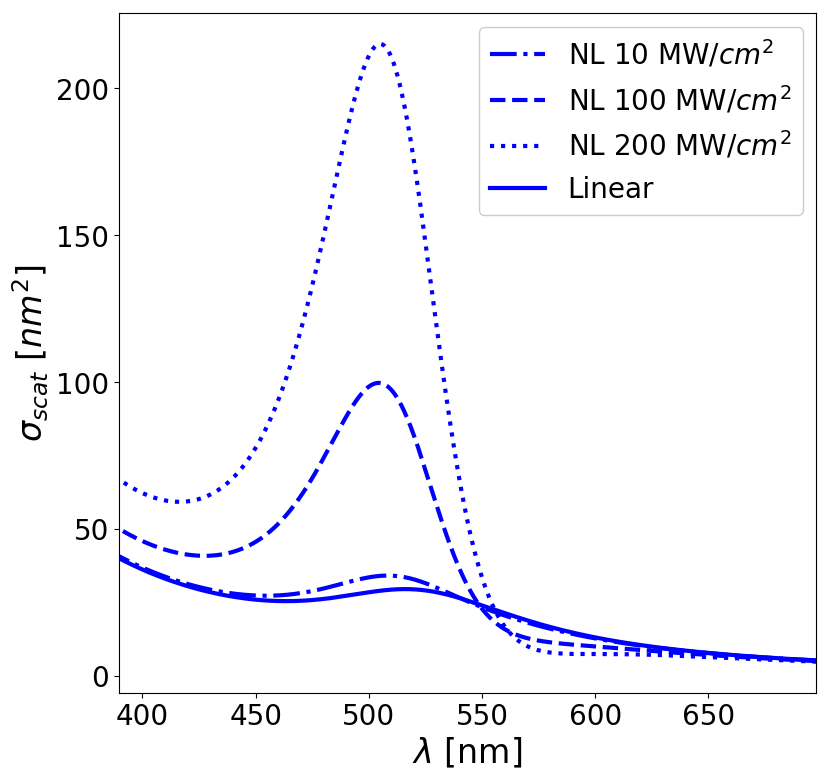

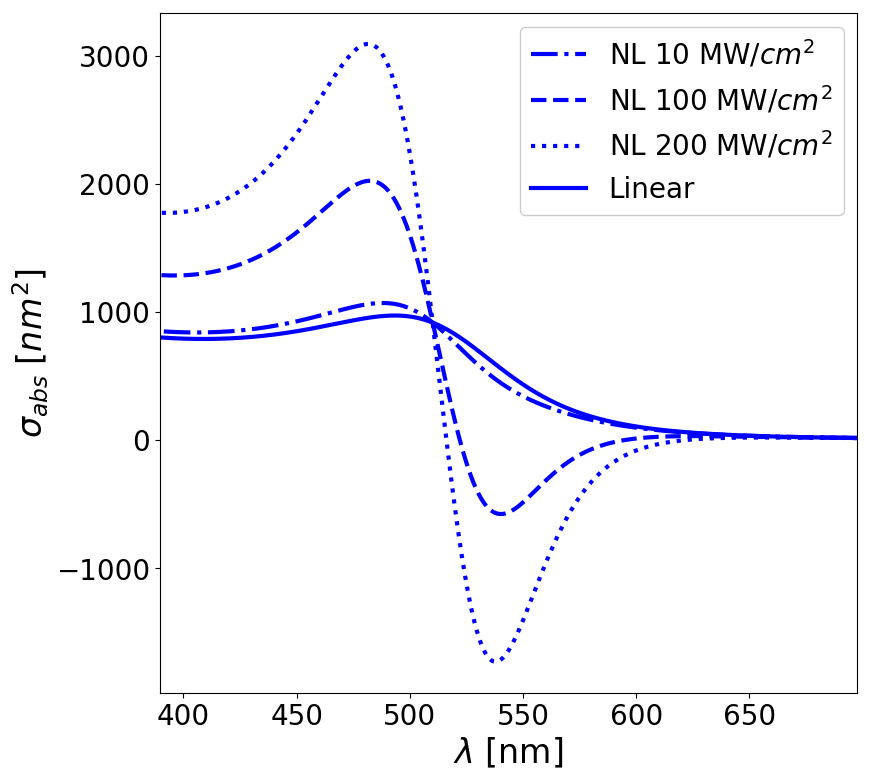

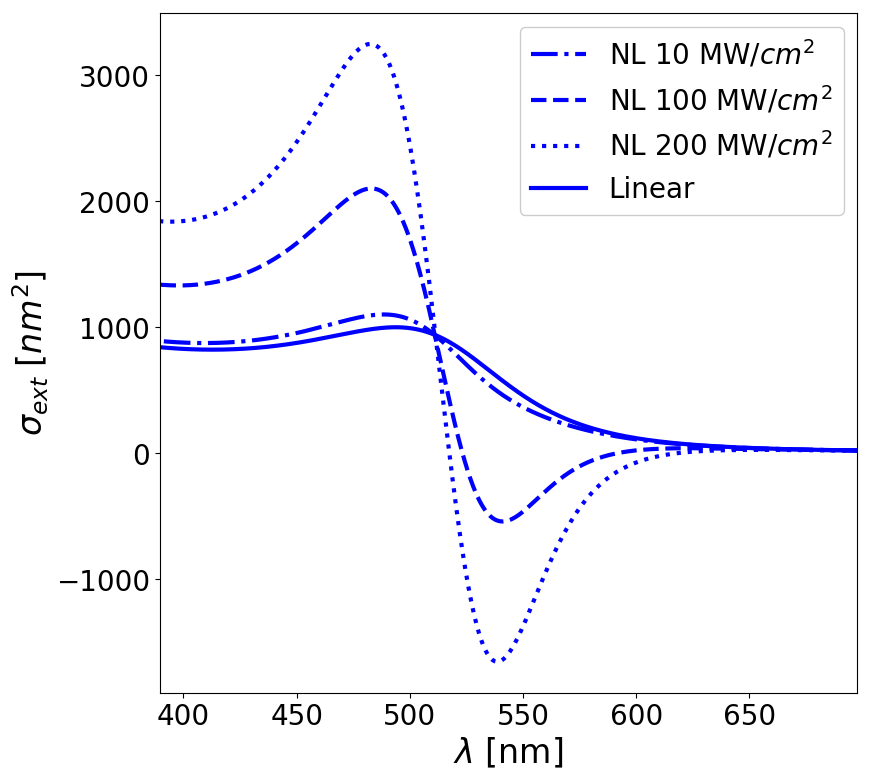

In [88]:
eps_0 = 8.85*1e-12

eps_real = np.loadtxt("/Users/amirhossein/Desktop/New_Gold_JC_real.txt",skiprows=2)
eps_imag = np.loadtxt("/Users/amirhossein/Desktop/New_Gold_JC_imag.txt",skiprows=2)
omega = 2*np.pi*1e12*eps_real[:,0]
eps_r = eps_real[:,1]+eps_imag[:,1]*1j
eps = eps_r*eps_0

n0 = 377
I = np.array([10,100,200])*1.e10
E_sqr = (I*(2*n0))

X3r = (-9.5+2.3*1j)*(1.e-15)
X3 = X3r*eps_0

R = 20*1.e-9

c = 3/(eps_r+2)

C_1 = c - (X3r/(eps_r-1))*np.power(c,3)*E_sqr[0]
C_200 = c - (X3r/(eps_r-1))*np.power(c,3)*E_sqr[1]
C_400 = c - (X3r/(eps_r-1))*np.power(c,3)*E_sqr[2]


alpha_1 = C_1*(eps_r-1)*4./3.*np.pi*np.power(R,3)
alpha_200 = C_200*(eps_r-1)*4./3.*np.pi*np.power(R,3)
alpha_400 = C_400*(eps_r-1)*4./3.*np.pi*np.power(R,3)

alpha_lin = (eps_r-1)/(eps_r+2)*4.*np.pi*np.power(R,3)


landa = 2*np.pi*3e8/omega
k = 2*np.pi/landa

sigma_1 = np.power(k,4)/6/np.pi/np.power(eps_0,0)*np.power(np.abs(alpha_1),2)
sigma_200 = np.power(k,4)/6/np.pi/np.power(eps_0,0)*np.power(np.abs(alpha_200),2)
sigma_400 = np.power(k,4)/6/np.pi/np.power(eps_0,0)*np.power(np.abs(alpha_400),2)
sigma_lin = np.power(k,4)/6/np.pi/np.power(eps_0,0)*np.power(np.abs(alpha_lin),2)

# sigma_1 = np.power(np.abs(alpha_1),2)
# sigma_200 = np.power(np.abs(alpha_200),2)
# sigma_400 = np.power(np.abs(alpha_400),2)
# sigma_lin = np.power(np.abs(alpha_lin),2)

fig=plt.figure(figsize=(9, 9), dpi= 100, facecolor='w', edgecolor='k')

p1 = plt.plot(landa*1.e9,sigma_1*1.e18,linewidth=3,linestyle="dashdot",color="blue")
p2 = plt.plot(landa*1.e9,sigma_200*1.e18,linewidth=3,linestyle="--",color="blue")
p3 = plt.plot(landa*1.e9,sigma_400*1.e18,linewidth=3,linestyle="dotted",color="blue")
p4 = plt.plot(landa*1.e9,sigma_lin*1.e18,linewidth=3,linestyle="solid",color="blue")

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('$\lambda$ [nm]', size=24)
plt.ylabel('$\sigma_{scat}$ [$nm^2$]', size=24)

plt.legend(['NL 10 MW/$cm^2$', 'NL 100 MW/$cm^2$', 'NL 200 MW/$cm^2$',\
            'Linear'],fontsize=20,framealpha=1)

plt.xlim([np.amin(landa*1.e9),np.amax(landa*1.e9)])



sigma_abs_1 = np.power(k,1)*np.imag(alpha_1)
sigma_abs_200 = np.power(k,1)*np.imag(alpha_200)
sigma_abs_400 = np.power(k,1)*np.imag(alpha_400)
sigma_abs_lin = np.power(k,1)*np.imag(alpha_lin)

fig=plt.figure(figsize=(9, 9), dpi= 100, facecolor='w', edgecolor='k')

p1 = plt.plot(landa*1.e9,sigma_abs_1*1.e18,linewidth=3,linestyle="dashdot",color="blue")
p2 = plt.plot(landa*1.e9,sigma_abs_200*1.e18,linewidth=3,linestyle="--",color="blue")
p3 = plt.plot(landa*1.e9,sigma_abs_400*1.e18,linewidth=3,linestyle="dotted",color="blue")
p4 = plt.plot(landa*1.e9,sigma_abs_lin*1.e18,linewidth=3,linestyle="solid",color="blue")

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('$\lambda$ [nm]', size=24)
plt.ylabel('$\sigma_{abs}$ [$nm^2$]', size=24)

plt.legend(['NL 10 MW/$cm^2$', 'NL 100 MW/$cm^2$', 'NL 200 MW/$cm^2$',\
            'Linear'],fontsize=20,framealpha=1)

plt.xlim([np.amin(landa*1.e9),np.amax(landa*1.e9)])


fig=plt.figure(figsize=(9, 9), dpi= 100, facecolor='w', edgecolor='k')

p1 = plt.plot(landa*1.e9,(sigma_abs_1+sigma_1)*1.e18,linewidth=3,linestyle="dashdot",color="blue")
p2 = plt.plot(landa*1.e9,(sigma_abs_200+sigma_200)*1.e18,linewidth=3,linestyle="--",color="blue")
p3 = plt.plot(landa*1.e9,(sigma_abs_400+sigma_400)*1.e18,linewidth=3,linestyle="dotted",color="blue")
p4 = plt.plot(landa*1.e9,(sigma_abs_lin+sigma_lin)*1.e18,linewidth=3,linestyle="solid",color="blue")

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('$\lambda$ [nm]', size=24)
plt.ylabel('$\sigma_{ext}$ [$nm^2$]', size=24)

plt.legend(['NL 10 MW/$cm^2$', 'NL 100 MW/$cm^2$', 'NL 200 MW/$cm^2$',\
            'Linear'],fontsize=20,framealpha=1)

plt.xlim([np.amin(landa*1.e9),np.amax(landa*1.e9)])


In [ ]:
sigma_1 = 